# Linear Algebra

#### 1.	Write a function angle_between(v1, v2) where v1 and v2 are two vectors that are passed in, and the angle between them is calculated.

In [34]:
import numpy as np
import math
from numpy import arccos, dot
from numpy.linalg import norm, inv

def angle_between(v1,v2):
    theta = arccos(dot(v1,v2.T)/(norm(v1)*norm(v2)))
    return theta

In [71]:
#u = np.array([8,2,9])
#v = np.array([7,1,3])

v = np.array([10, 9, 3])
w = np.array([2, 5, 12])

angle_between(v,w)

0.979924710443726

#### 2.	Write a function called row_dot(A, r1, r2) which takes an input matrix called A, one row number identified by r1, and another row number identified by r2 and returns the dot product of the r1 and r2 rows (indexing starts at 0).

In [21]:
def row_dot(A,r1,r2):
    dotproduct = np.dot(A[r1,:],A[r2,:])
    return dotproduct

In [24]:
A = np.array([[5,3,2],
              [3,2,3],
              [1,2,2]])

row_dot(A,0,2)

15

#### 3.	Write a function matrix_division(m1, m2) that takes in two matrices, m1 and m2, and returns the result. What is the trick with matrix division?

##### The two matrices have to have the same dimension

In [32]:
def matrix_division(m1,m2):
    result = m1 * inv(m2)
    return result

In [33]:
m1 = np.array([[5,3,2],
               [3,2,3],
               [1,2,2]])

matrix_division(m1,m1)

array([[ 0.90909091,  0.54545455, -0.90909091],
       [ 0.81818182, -1.45454545,  2.45454545],
       [-0.36363636,  1.27272727, -0.18181818]])

#### 4.	Write a function is_orthogonal(v1,v2, tol), where v1 and v2 are column vectors of the same size and tol is a scalar value strictly larger than 0. The output should be 1 if the angle between v1 and v2 is within tol of π/2; that is, |π/2−θ|<tol|π/2−θ|<tol, and 0 otherwise. You may assume that v1 and v2 are column vectors of the same size, and that tol is a positive scalar. 

In [79]:
def is_orthogonal(v1,v2,tol):
    v1 = np.squeeze(np.asarray(v1))
    v2 = np.squeeze(np.asarray(v2))
    theta = angle_between(v1,v2)
    if abs((math.pi/2) - theta) < tol: 
        return 1
    else:
        return 0

In [83]:
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])
# output: 1
is_orthogonal(a,b, 0.01)

is_orthogonal(a,b, 0.001)

# output: 0
a = np.array([[1], [0.001]])
b = np.array([[1], [1]])
is_orthogonal(a,b, 0.01)

# output: 1
a = np.array([[1], [1]])
b = np.array([[-1], [1]])
is_orthogonal(a,b, 1e-10)

1

#### 5.	Create a class called vector_calculator. __init__ should take self, vector1, and vector2. It should have two methods inside of it that are from problems 1 and 4 above (angle_between and is_orthogonal). Make sure tol is defaulted but can be overwritten. Make sure you can call angle_between and is_orthogonal through the class and return the correct results as in problems 1 and 4.

In [97]:
class vector_calculator():
    
    def __init__(self, vector1, vector2):
        self.vector1 = np.squeeze(np.asarray(vector1))
        self.vector2 = np.squeeze(np.asarray(vector2))
        
    def angle_between(self):
        theta = arccos(dot(self.vector1,self.vector2.T)/(norm(self.vector1)*norm(self.vector2)))
        return theta
    
    def is_orthogonal(self, tol = 0.01):
        vector1 = self.vector1
        vector2 = self.vector2
        #vector1 = np.squeeze(np.asarray(self.vector1))
        #vector2 = np.squeeze(np.asarray(self.vector2))
        theta = self.angle_between()
        if abs((math.pi/2) - theta) < tol: 
            return 1
        else:
            return 0
        
#v = np.array([10, 9, 3])
#w = np.array([2, 5, 12])

#a = np.array([[1], [0.001]])
#b = np.array([[0.001], [1]])

#a = np.array([[1], [0.001]])
#b = np.array([[1], [1]])

a = np.array([[1], [1]])
b = np.array([[-1], [1]])

myVector = vector_calculator(a,b)
myVector.angle_between()
myVector.is_orthogonal(1e-10)

1.5707963267948966

#### 6.	Show a graphical representation of the breast cancer data outlined in this reading https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python Be sure to describe what PCA is and incorporate the principal components in your plot. This is just exploratory, so there are many correct answers!!

#### PCA is taking a large dataset with a lot of variables and reducing the dimension so that there are fewer relationships between variables. By doing this, the dataset becomes easier to work with. 

#### PCA is done on the breast cancer data to show malignant vs benign tumor in a two-dimensional space. 

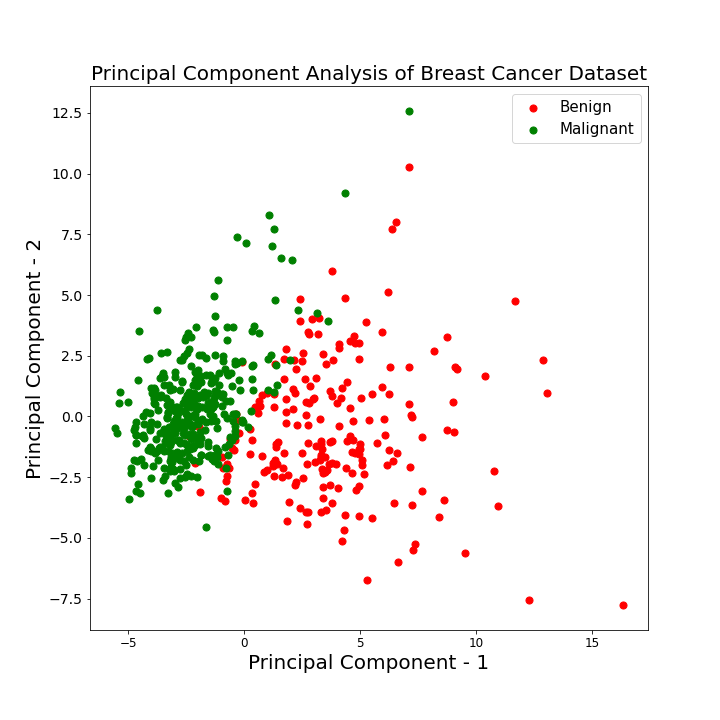